# Simple Neuron
- inputs --> features
- features assigned weights based on contribution to prediction
- bias helps in controlling the value at which activation function will trigger.
- bias is essential to create an optmal fit, it allows for the activation threshold to move to the left/right.
- More the weight, earlier trigger of the activation function.

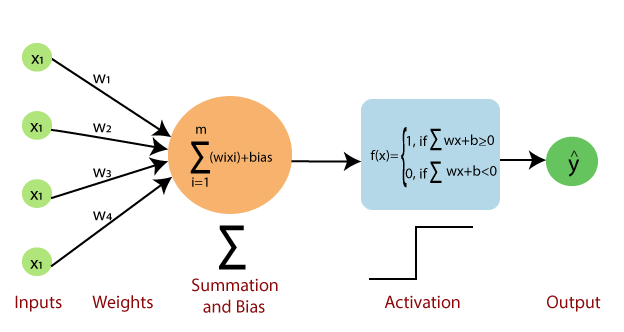

# Neural Net Architecture
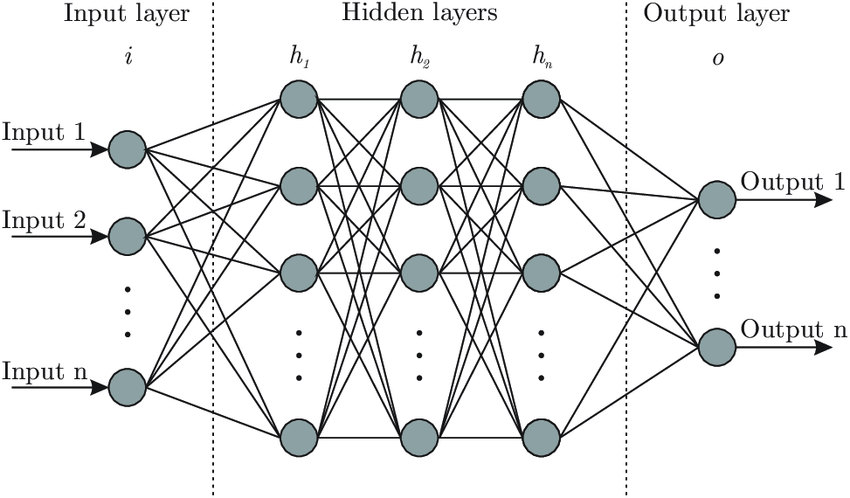

# Single Layer Perceptron vs MLP architecture
- fig a: Architecture of a single layer perceptron. The architecture consists of a layer on input neurons fully connected to a single layer of output neurons. 
- fig b: multi-layer perceptron including more than one layer of trainable weights. In this example, the network includes 3 layers: input, hidden and output layer. Each connection between two neurons is given by a certain weight.

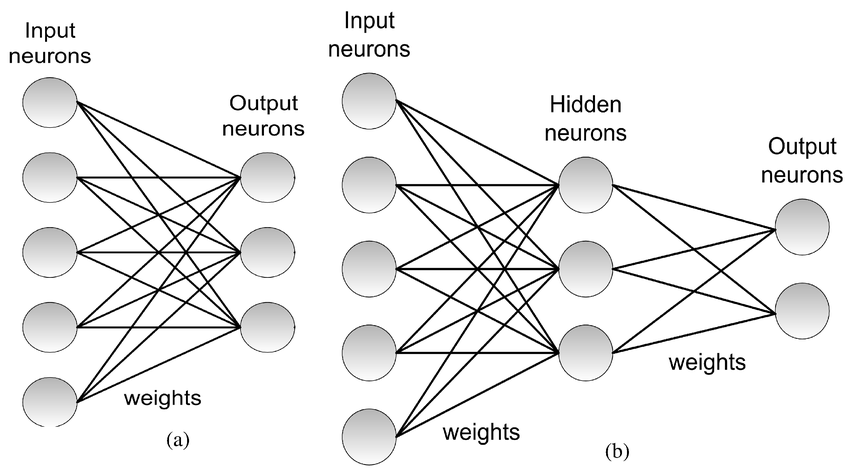

# Back Prop
- make a prediction, confirm if true prediction or not.
- if mistake made, back propogate the error through the network and readjust weights and biases to predict correctly.
- repeat for each sample until a global optimum achived for predicting the inputs.
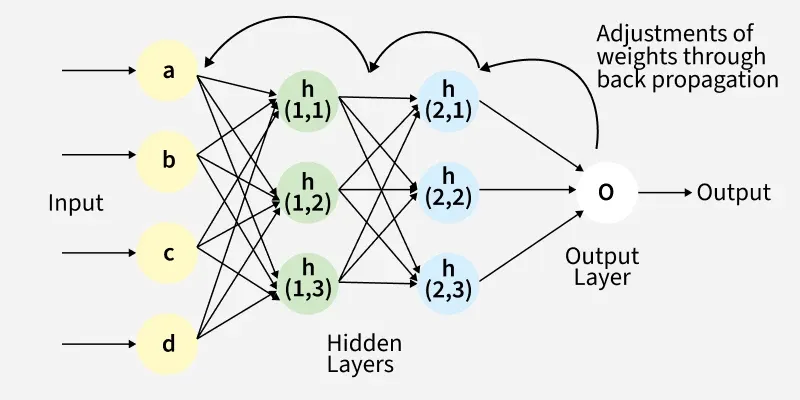



In [2]:
#### Adding hidden layers to the same notebook for Single Layer Perceptron model for mnist classification.

import warnings
warnings.filterwarnings('ignore')

#### Neural networks: mimic biological neural nets to learn from inputs and draw conclusions.

'''
Difference between PyTorch, TensorFlow and Keras
- Pytorch(FaceBook), TensorFlow (Google), CNTK (microsoft) ---> DL frameworks
- Keras ---> wrapper around TensorFlow, CNTK and theano 
'''

# mnist handwritten digits classification using ANN
# input image ---> flatten the 2D image/pixel bitmap [0,255] 
# input neurons will be the feature vector for the flattened pixel values

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print("Training Samples: ", len(X_train))
print("Testing Samples: ", len(X_test))

Training Samples:  60000
Testing Samples:  10000


In [5]:
print(np.shape(X_train[0]))

(28, 28)


In [6]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

label:  5


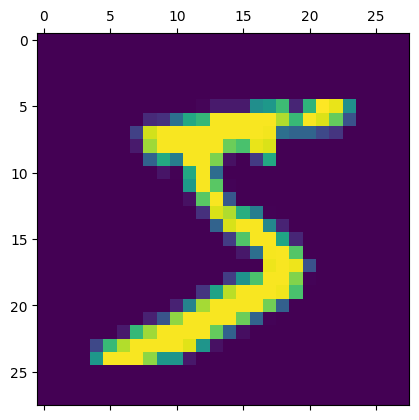

In [7]:
plt.matshow(X_train[0])
print("label: ", y_train[0])

In [8]:
### Flatten the train set

## We need a feature vector containing all 60000 training examples as 1D vector of 28x28 entries each.
flattened_X_train = X_train.reshape(len(X_train), 28*28)
flattened_X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784), dtype=uint8)

In [9]:
### Flatten the test set

flattened_X_test = X_test.reshape(len(X_test), 28*28)
flattened_X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(10000, 784), dtype=uint8)

In [10]:
### Creating a neural net with 1 Input Layer and 1 Output Layer

# 784 neurons in the input layer ---> 784 feature entries per sample
# 10 neurons in the output layer ---> 10 classes

# dense ensures each neuron in adcant layers are interconnected
unscaled_model = keras.Sequential([
    keras.layers.Dense(10, # number of output neurons
                       input_shape=(784,), # shape of input/ number of nodes in the input
                       activation='sigmoid')
])

unscaled_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

unscaled_model.fit(flattened_X_train, y_train, epochs=5)

### With unscaled input data ---> 32% accurate

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 751us/step - accuracy: 0.3740 - loss: 9.7445 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3588 - loss: 6.0909
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3524 - loss: 5.7796
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3391 - loss: 5.4517
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3316 - loss: 5.2762


In [11]:
### Scaling data between 0 and 1 ---> Normalization

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

scaled_X_train_flattened = X_train_scaled.reshape(len(X_train_scaled), 28*28)
scaled_X_test_flattened = X_test_scaled.reshape(len(X_test_scaled), 28*28)

X_train_scaled # all vals between 0 and 1

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
scaled_model = keras.Sequential([
    keras.layers.Dense(
        10,
        input_shape=(784,),
        activation='sigmoid'
    )
])

scaled_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

scaled_model.fit(scaled_X_train_flattened, y_train, epochs=5)

#### Accuracy jumps to 92.57%

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8770 - loss: 0.4721
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9151 - loss: 0.3037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9208 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.9248 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.9261 - loss: 0.2662


In [13]:
scaled_model.evaluate(scaled_X_test_flattened, y_test)

# 92.48% accuracy on the test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9228 - loss: 0.2760


[0.2760133743286133, 0.9228000044822693]

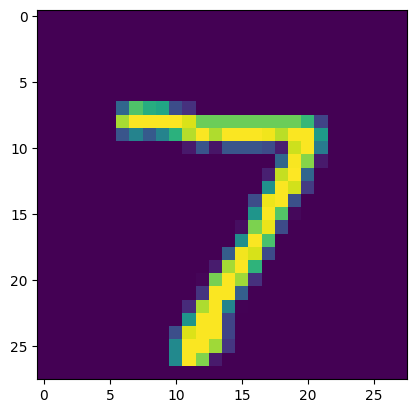

In [14]:
plt.imshow(X_test[0])

In [15]:
predictions = scaled_model.predict(scaled_X_test_flattened)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


array([2.8737808e-02, 3.4651072e-07, 5.9104819e-02, 9.5836180e-01,
       3.3196243e-03, 9.4195150e-02, 1.6865469e-06, 9.9984354e-01,
       1.1221004e-01, 6.4891452e-01], dtype=float32)

In [16]:
print("prediction: ", np.argmax(predictions[0]))
### predicts 7 and the image is 7

prediction:  7


In [17]:
#### saving model predictions into an array as whole numbers instead of scores

predictions_labels = [np.argmax(i) for i in predictions]
predictions_labels[:10] #### first 10 predictions as whole numbers

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9)]

In [18]:
### True Labels for the first 5 images

true_labels = y_test
true_labels[:10]



array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [19]:
conf = tf.math.confusion_matrix(true_labels, predictions_labels)
conf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    3,    0,    5,    4,    2,    1,    0],
       [   0, 1113,    3,    3,    0,    1,    3,    2,   10,    0],
       [   9,   14,  898,   24,    9,    3,   13,   10,   49,    3],
       [   1,    0,   10,  947,    1,    8,    2,   10,   23,    8],
       [   1,    1,    3,    2,  927,    0,   10,    3,   11,   24],
       [   9,    3,    2,   64,   12,  736,   15,   10,   35,    6],
       [  13,    3,    4,    1,    8,    8,  917,    1,    3,    0],
       [   1,    7,   20,    9,    9,    0,    0,  951,    4,   27],
       [   5,   10,    5,   33,    9,   18,    9,   12,  868,    5],
       [  10,    7,    1,   14,   37,    4,    0,   22,    7,  907]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

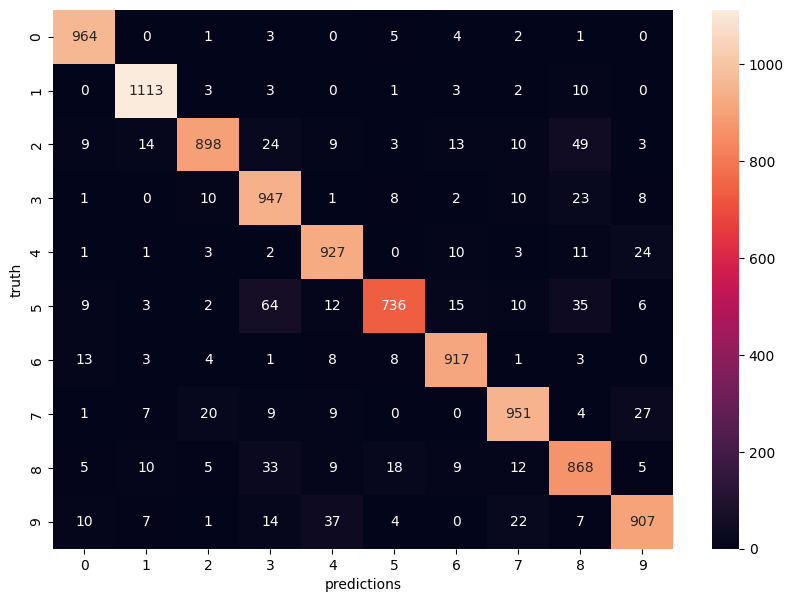

In [20]:
plt.figure(figsize=(10,7),)
sns.heatmap(conf, annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel('truth')

In [ ]:
mlp_model = keras.Sequential([
    # 1 hidden layer with 100 nodes = nodes-next-layer, nodes-this-layer
    keras.layers.Dense(100, input_shape=(784,),activation='relu'), # input layer conn to hidden layer with 100 nodes 
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.fit(scaled_X_train_flattened, y_train, epochs=5)

# with 1 added layer of 100 neurons ---> accuracy bumped to 98% on train set

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9197 - loss: 0.2810
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9628 - loss: 0.1270
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9736 - loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9801 - loss: 0.0658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9834 - loss: 0.0536


In [ ]:
mlp_model.evaluate(scaled_X_test_flattened, y_test)

### almost 97.02% accurate

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9702 - loss: 0.0946


[0.09463482350111008, 0.9702000021934509]

In [32]:
y_predicted = mlp_model.predict(scaled_X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

conf_mlp = tf.math.confusion_matrix(y_test, y_predicted_labels)
conf_mlp

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    4,    2,    2,    1,    2,    3,    2,   14],
       [   0, 1126,    1,    4,    0,    0,    2,    0,    2,    0],
       [   1,    3,  965,   46,    1,    1,    3,    6,    6,    0],
       [   0,    0,    0, 1002,    0,    2,    0,    3,    2,    1],
       [   1,    0,    1,    1,  966,    0,    3,    2,    0,    8],
       [   2,    0,    0,   22,    2,  858,    2,    2,    2,    2],
       [   1,    3,    2,    1,    2,   11,  936,    0,    2,    0],
       [   0,    5,    6,    8,    1,    0,    0, 1000,    0,    8],
       [   3,    0,    2,   17,    6,    7,    3,    4,  929,    3],
       [   1,    4,    0,   12,    8,    4,    1,    7,    2,  970]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

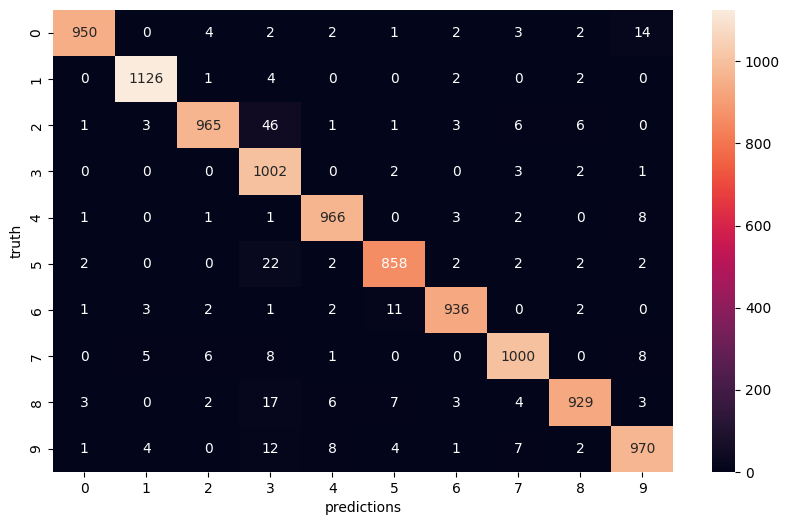

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(conf_mlp, annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel('truth')

In [41]:
######### Using the keras flatten layer method to auto flatten array
######### Allows to pass the X_train directly rather than manual flattening
auto_flatten_mlp_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer
    keras.layers.Dense(100, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

auto_flatten_mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

auto_flatten_mlp_model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5929 - loss: 2.5255
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5686 - loss: 0.4248
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5279 - loss: 0.3076
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4697 - loss: 0.2565
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4526 - loss: 0.2383
